# Homework 5 Solutions

Computational Physics Fall 2025 

# Problem 1: Period of anharmonic oscillators

## Part A

To calculate the period we use the equation of motion 
$$
E = \frac{m}{2}v^2 + V \iff v = \pm \sqrt{\frac{2(E-V)}{m}} \implies dt = \pm \sqrt{\frac{m}{2}} \frac{1}{\sqrt{E-V}} dx.
$$
From here we use the fact that $E = V(a)$ and that the time it takes for the particle to travel from $x=a$ to $x=0$ is $T/4$. Therefore we have that
$$
T = \sqrt{8m}\int_{0}^{a} \frac{1}{\sqrt{E-V}} dx. 
$$

## Part B

Let's define a function that integrates a function using gaussian quadrature.

(0.0, 2.0)

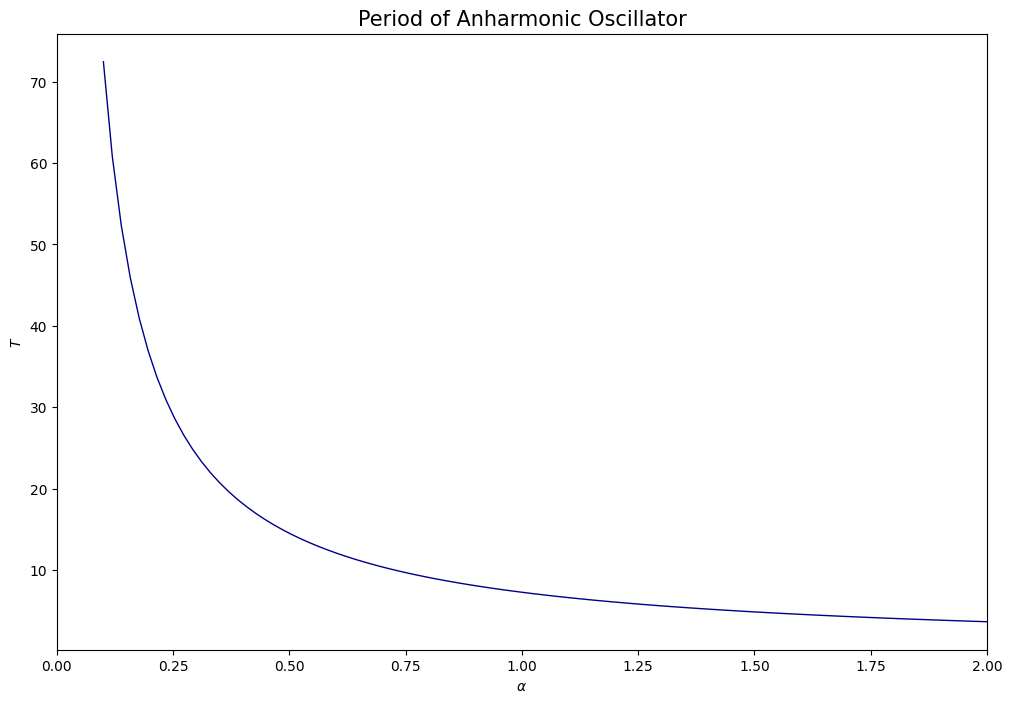

In [1]:
# Gaussian Quadratures
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.legendre import leggauss
from typing import Callable

def quadrature(f:Callable, a:float, b:float, N:int = 4) -> float:
    # Get the points and weights
    zeros, weights = leggauss(N)

    # Recast the limits from (a,b) -> (0,1) and sum
    return sum([ (b-a)*f(x*(b-a) + a)*w for x,w in zip(zeros, weights)])

# The function we want to integrate
V = lambda x: x**4 
def f(a:float = 2): 
    return lambda x: (8/(V(a) - V(x) + 1e-20))**(0.5)

# Finally do this for more alphas 
N = 20
A = np.linspace(1e-1, 2, 100)
T = [quadrature(f(a), 0, a, N) for a in A]

# PLOTTING ---------------------------------------------------
fig = plt.figure(figsize=(12,8))
ax  = fig.add_subplot(111)

# Add the plot elements
ax.plot(A, T, color='darkblue', lw=1)


# Some prettification steps
ax.set_title("Period of Anharmonic Oscillator",fontsize=15)
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$T$')
ax.set_xlim(0,A[-1])

# Problem 2 : Vector Potential and Elliptic Integrals

Notice that in the previous problem, we got the right answer by accedent since there were singularities on our integrand and therefore we shouldn't expect gaussian quadrature to actually work. Here is a better way. 

We know how we can approximate integrals of the form 
$$
\int_{-1}^1 \frac{f(x)}{\sqrt{1-x^2}} dx,
$$
using Chebyshev quadrature. So let's do some quick change of variables $x = \sin\phi$ and rewrite our integrals like so
$$
K(k) = \frac{1}{2}\int_{-1}^{1}\frac{1}{\sqrt{1-k^2x^2}}\frac{dx}{\sqrt{1-x^2}} = \int_{-1}^{1} \frac{W(x)}{2\sqrt{1-k^2x^2}} dx.
$$
And similarly for $E$ 
$$
E(k) = \frac{1}{2}\int_{-1}^1\frac{\sqrt{1-k^2x^2}}{\sqrt{1-x^2}} dx = \int_{-1}^1 \frac{1}{2} \sqrt{1-k^2x^2} W(x) dx.
$$


/tmp/ipykernel_5096/1323101061.py:21: RuntimeWarning: invalid value encountered in scalar divide
  return 4*I*a/np.sqrt(a*a + r*r + 2*a*r*np.sin(theta)) * ((2-K)*chebychev(f(K),N) - 2*chebychev(g(K),N)) / K


Text(0, 0.5, '$A$')

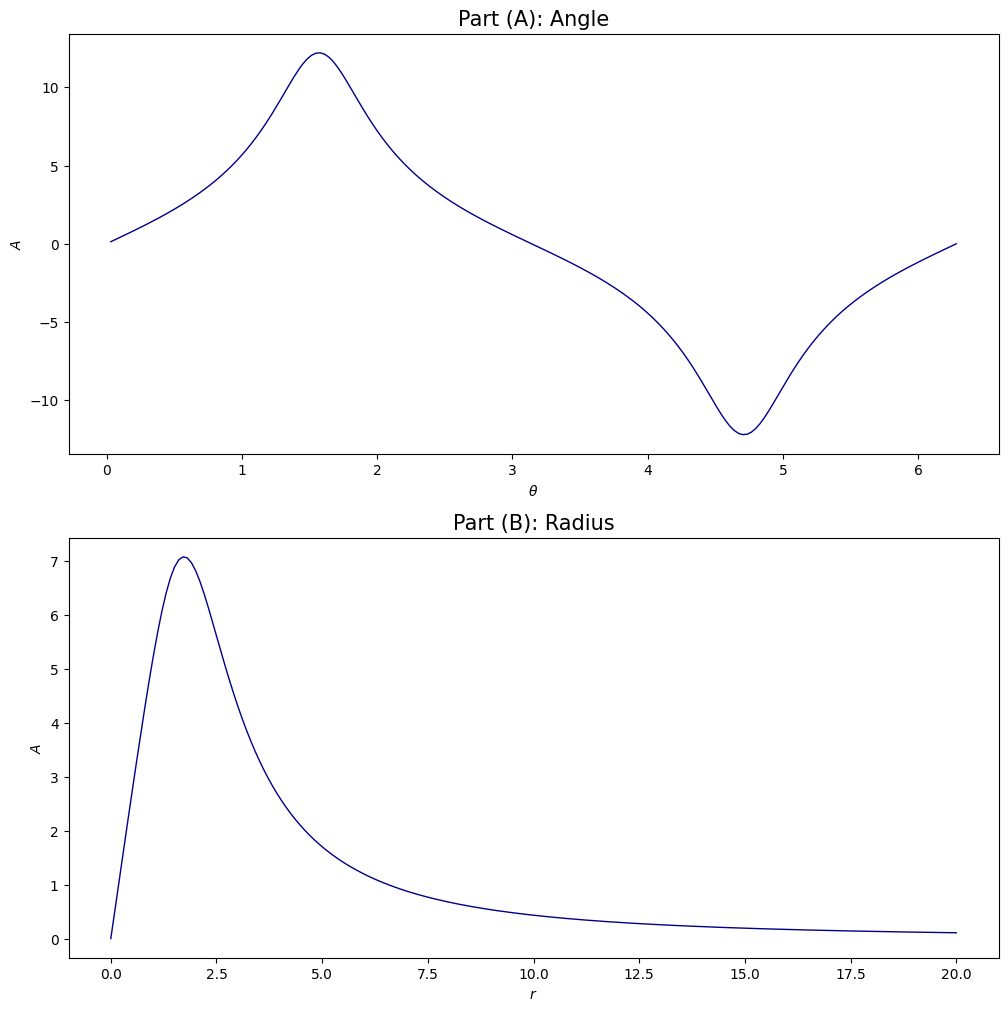

In [2]:
# Get the quadrature
from numpy.polynomial.chebyshev import chebgauss

# Define our functions
def f(k:float):
    return lambda x: 1/(2*np.sqrt(1-k*x**2))

def g(k:float):
    return lambda x: np.sqrt(1-k*x**2)/2

k = lambda a,r,theta: 4*a*r*np.sin(theta)/(a*a + r*r + 2*a*r*np.sin(theta))

# Calculate a Chebychev quadrature
def chebychev(F:Callable, N:int = 10):
    points, roots = chebgauss(N)
    return sum([F(x)*w for x,w in zip(points,roots)])

# Finally let's get A
def A(r:float, theta:float, a:float=2, I:float=4,N:int=10):
    K = k(a,r,theta)
    return 4*I*a/np.sqrt(a*a + r*r + 2*a*r*np.sin(theta)) * ((2-K)*chebychev(f(K),N) - 2*chebychev(g(K),N)) / K


# Calculate it in some range that we want
Theta   = np.linspace(0,     2*np.pi-1e-3, 200)
R       = np.linspace(1e-10, 20,           200)

ar      = [A(2.3, theta)     for theta in Theta]
atheta  = [A(r,   2*np.pi/3) for r     in R]


# PLOTTING ---------------------------------------------------
fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

# Add the plot elements
ax1.plot(Theta, ar, color='darkblue', lw=1)
ax2.plot(R, atheta, color='darkblue', lw=1)


# Some prettification steps
ax1.set_title("Part (A): Angle",fontsize=15)
ax2.set_title("Part (B): Radius",fontsize=15)
ax1.set_xlabel(r'$\theta$')
ax1.set_ylabel(r'$A$')
ax2.set_xlabel(r'$r$')
ax2.set_ylabel(r'$A$')
# ax.set_xlim(0,A[-1])

# Problem 3: Numerical Differentiation

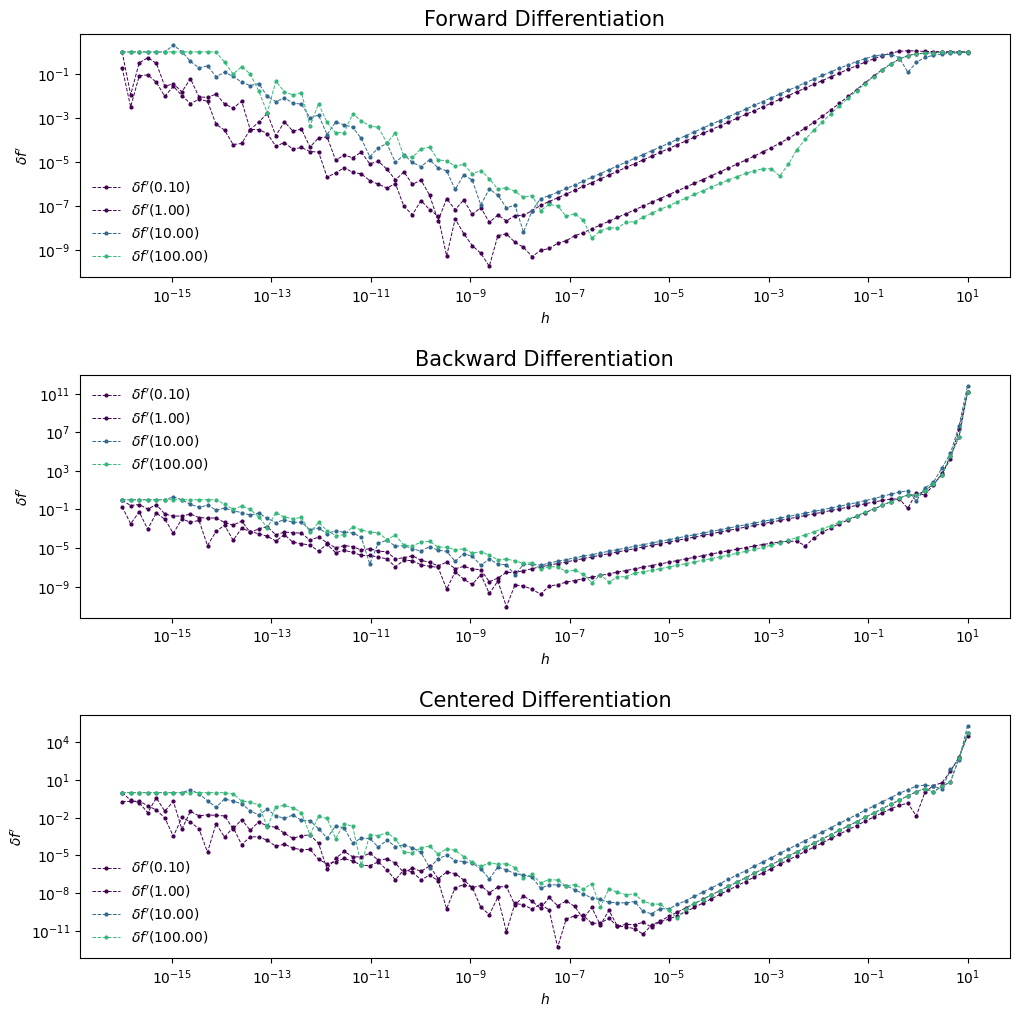

In [3]:
# Let's define the three functions
df = lambda f,x,h: (f(x+h)   - f(x))    /h
db = lambda f,x,h: (f(x)     - f(x-h))  /h
dc = lambda f,x,h: (f(x+h/2) - f(x-h/2))/h

# And also define the function we want to differentiate along with its true derivative
f  = lambda x: np.exp(-3*x,dtype=np.float64) * np.cos(5*x,dtype=np.float64)
fp = lambda x: np.exp(-3*x,dtype=np.float64) * (-3* np.cos(5*x,dtype=np.float64) - 5*np.sin(5*x,dtype=np.float64))

# Function that calculates the error
def error(f:Callable, fp:Callable, d:Callable, x:np.float64, h:np.float64):
    return (d(f,x,h) - fp(x))/fp(x)

X = np.array([0.1,1,10,100],dtype=np.float64)
H = np.logspace(-16,1,100)
M = {"Forward": df, "Backward": db, "Centered": dc}
E = {label: {x:[error(f,fp,M[label], x, h) for h in H] for x in X} for label in M}


# PLOTTING ---------------------------------------------------
fig, AX = plt.subplots(nrows=3, figsize=(12,12))
fig.subplots_adjust(hspace=0.4)
colors = {x:color for x,color in zip(X,plt.cm.viridis(np.log(X)/((max(np.log(X)) - min(np.log(X))))))}

# Add the plot elements
for label,ax in zip(M,AX):
    for x in X:
        ax.plot(H, np.abs(E[label][x]), color=colors[x], ms=4, lw=0.7, ls='--', marker= ".", alpha=1.0, label=rf"$\delta f'(%.2f)$"%x)

    # Some prettification steps
    ax.set_title(label + " Differentiation",fontsize=15)
    ax.legend(frameon=False)
    ax.set_ylabel(r"$\delta f'$")
    ax.set_xlabel(r'$h$')
    ax.set_xscale('log')
    ax.set_yscale('log')

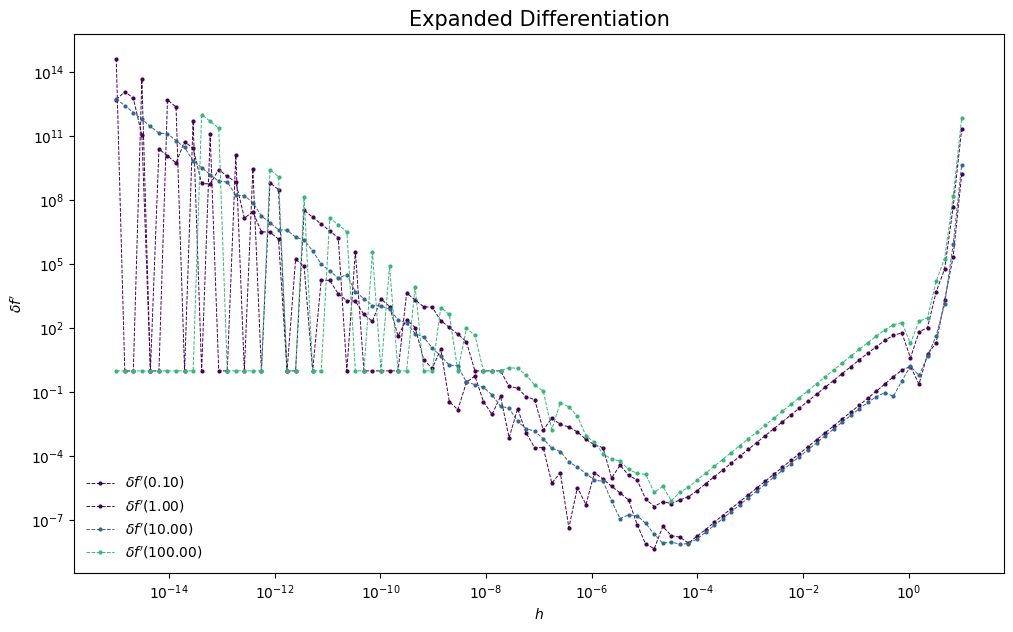

In [ ]:
# Let's define the two functions
dd = lambda f,x,h: (f(x+h) - 2*f(x) + f(x-h))/h**2

# And also define the function we want to differentiate along with its true derivative
f  = lambda x: np.float64(np.exp(-3*x,dtype=np.float64) * np.cos(5*x,dtype=np.float64))
fp = lambda x: np.exp(-3*x,dtype=np.float64) * (30*np.sin(5*x,dtype=np.float64) -16*np.cos(5*x,dtype=np.float64))

# Function that calculates the error
def error(f:Callable, fp:Callable, d:Callable, x:np.float64, h:np.float64):
    return (d(f,x,h) - fp(x))/fp(x)

X = np.array([0.1,1,10,100],dtype=np.float64)
H = np.logspace(-15,1,100)
M = { "Expanded": dd}
E = {label: {x:[error(f,fp,M[label], x, h) for h in H] for x in X} for label in M}


# PLOTTING ---------------------------------------------------
fig, AX = plt.subplots(nrows=1, figsize=(12,7))
AX = [AX]
fig.subplots_adjust(hspace=0.4)
colors = {x:color for x,color in zip(X,plt.cm.viridis(np.log(X)/((max(np.log(X)) - min(np.log(X))))))}

# Add the plot elements
for label,ax in zip(M,AX):
    for x in X:
        ax.plot(H, np.abs(E[label][x]), color=colors[x], ms=4, lw=0.7, ls='--', marker= ".", alpha=1.0, label=rf"$\delta f'(%.2f)$"%x)

    # Some prettification steps
    ax.set_title(label + " Differentiation",fontsize=15)
    ax.legend(frameon=False)
    ax.set_ylabel(r"$\delta f''$")
    ax.set_xlabel(r'$h$')
    ax.set_xscale('log')
    ax.set_yscale('log')

# Problem 4: Differentiating by Integrating

The calculating we need to do at the end of the day is 
$$
\left.\frac{d^m f}{d z^m}\right|_{z=0} = \frac{m!}{N}\sum_{k=0}^{N-1} f(z_k) e^{\frac{2\pi i k m}{N}},
$$
where $z_k = e^{2\pi k/N}$ is an $N^{\text{th}}$ root of unity.

In [5]:
from cmath import exp
from math import factorial

def derivative(f:Callable,m:int,N:int=1000):
    return factorial(m)/N * sum([ f(exp(2*np.pi*1j *k/N)) * exp(-2*np.pi*1j*k*m/N) for k in range(N)]) 

f  = lambda x: exp(2*x)
fp = lambda m: 2**m

M = np.arange(1,23,dtype=int)
for m in M:
    d = derivative(f,m)
    e = abs(d - fp(m))
    print(f"%2d: %11.3f {'+' if d.imag>0 else "-"} %.2ei %8d   Error: %1.3e"%(m,d.real,abs(d.imag),fp(m),e))

 1:       2.000 - 3.46e-16i        2   Error: 2.467e-15
 2:       4.000 - 4.97e-16i        4   Error: 1.018e-15
 3:       8.000 - 1.73e-15i        8   Error: 1.520e-14
 4:      16.000 + 3.10e-15i       16   Error: 4.714e-15
 5:      32.000 - 1.64e-14i       32   Error: 3.279e-14
 6:      64.000 - 2.57e-14i       64   Error: 1.584e-13
 7:     128.000 - 9.69e-13i      128   Error: 1.028e-12
 8:     256.000 + 7.29e-12i      256   Error: 1.201e-11
 9:     512.000 + 1.60e-11i      512   Error: 2.138e-11
10:    1024.000 - 9.84e-10i     1024   Error: 1.044e-09
11:    2048.000 + 1.60e-09i     2048   Error: 4.631e-09
12:    4096.000 + 2.00e-07i     4096   Error: 2.007e-07
13:    8192.000 + 3.12e-07i     8192   Error: 2.232e-06
14:   16384.000 - 4.10e-05i    16384   Error: 4.101e-05
15:   32768.000 + 4.04e-05i    32768   Error: 9.798e-05
16:   65536.001 + 6.39e-04i    65536   Error: 1.005e-03
17:  131071.958 - 2.17e-02i   131072   Error: 4.746e-02
18:  262143.533 + 5.99e-01i   262144   Error: 7.